# 1. Basic of deeplearning

## Title

- Basic of deeplearning
    - 1.1 A first look at a neural network
    - 1.2 Data representations for neural networks
        - 1.2.1 Scalars (0D tensors)
        - 1.2.2 Vectors (1D tensors)
        - 1.2.3 Matrices (2D tensors)
        - 1.2.4 3D tensors and higher-dimensional tensors
        - 1.2.5 Key attributes
        - 1.2.6 Manipulating tensors in Numpy
        - 1.2.7 The notion of data batches
        - 1.2.8 Real-world examples of data tensors
        - 1.2.9 Vector data
        - 1.2.10 Timeseries data or sequence data
        - 1.2.11 Image data
        - 1.2.12 Video data

## Setup

In [4]:
%run setup.py

<br>

## 1.1 A first look at a neural network

케라스를 이용하여 손글씨 숫자 분류를 학습하는 구체적인 신경망 예제를 살펴보겠습니다. MNIST는 흑백 손글씨 숫자 이미지(28 X 28픽셀)를 10개의 범주(0~9)로 분류하는 것입니다. 이 데이터셋은 머신 러닝의 역사만큼 오래되었고 많은 연구에 사용되었습니다. 이 데이터셋은 1980년대 미국 국립표준기술소(National Institute of Standards and Technololgy, NIST)에서 수집한 6만 개의 훈련 이미지와 1만 개의 테스트 이미지로 구성되어 있습니다. MNIST 문제를 알고리즘이 제대로 작동하는지 확인하기 위한 딥러닝계의 "Hello world"정도로 생각해도됩니다. MNIST 샘플을 아래 그림과 같습니다.

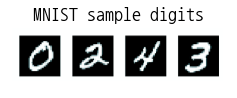

In [5]:
plt.figure(figsize=(4, 2))
plt.title("MNIST sample digits", fontsize=18)
plot_external2("./images/ch01/1.png")
plt.show()

<br>

> 머신러닝에서 분류 문제의 범주(category)를 클래스라고 합니다. 데이터 포인트는 샘플(sample)이라고 합니다. 특점 샘플의 클래스는 레이블(label)이라고 합니다.

In [6]:
# 케라스에서 MNIST 데이터셋 로드하기
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


**train_images**와 **train_labels**가 모델이 학습해야할 훈련 세트를 구성합니다. 모델을 **test_images**와 **test_labels**로 구성된 테스트 세트에서 테스트될 것입니다. 이미지는 넘파이 배열로 인코딩되어 있고 레이블은 0부터 9까지의 숫자 배열입니다. 이미지와 레이블을 일대일 관계입니다.

훈련 데이터를 살펴보면 다음과 같습니다:

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

다음은 테스트 데이터입니다:

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

In [12]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

작업 순서는 다음과 같습니다. 먼저 훈련 데이터 train_images와 train_labels를 네트워크에 주입합니다. 그러면 네트워크는 이미지와 레이블을 연관시킬 수 있도록 학습됩니다. 마지막으로 test_images에 대한 예측을 네트워크에 요청합니다. 그리고 이 예측이 test_labels와 맞는지 확인할 것입니다.

신경망을 구성하는 코드는 다음과 같습니다.

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation="softmax"))

W0808 18:17:53.550085 139644289607488 deprecation.py:506] From /opt/conda/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


신경망의 핵심 구성 요소는 일종의 데이터 처리 필터라고 생각할 수 있는 layer입니다. 어떤 데이터가 들어가면 더 유용한 형태로 출력됩니다. 조금 더 구체적으로 층은 주어진 문제에 더 의미있는 쵸현(representation)을 입력된 데이터로부터 추출합니다. 대부부분의 딥러닝은 간단한 층을 연결하여 구성되어 있고, 점진적으로 데이터를 정제하는 형태를 띄고 있습니다. 딥러닝 모델은 데이터 정제 필터(층)가 연속되어 있는 데이터 프로세싱을 위한 여과기와 같습니다.  

이 예에서는 조밀하게 연결된(또는 완전 연결(fully connected) 신경망 층인 Dense 층 2개가 연속되어 있습니다. 2번째 층은 10개의 확률 점수가 들어 있는 배열을 반환하는 소프트맥스(softmax)층입니다. 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률입니다.  

신경망이 훈련 준비를 마치기 위해서 컴파일 단계에 포함될 3가지가 더필요합니다.  
- 손실 함수: 훈련 데이터에서 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와줍니다.  
- 옵티마이저(optimizer): 입력 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘입니다.  
- 훈련과 테스트 과정을 모니터링할 지표: 여기에서는 정확도만 고려하겠습니다.  

In [14]:
network.compile(optimizer="rmsprop", 
                loss = "categorical_crossentropy", 
                metrics = ["accuracy"])

훈련을 시작하기 전에 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1사이로 스케일을 조정합니다. 예를 들어 앞서 우리의 훈련 이미지는 [0, 255]사이의 값인 uint8타입의 (60000, 28, 28)크기를 가진 배열로 저장되어 있습니다. 이 데이터를 0과 1사이의 값을 가지는 float32 타입의 (60000, 28*28)크기인 배열로 바꿉니다.

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype("float32")/255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype("float32")/255

또한 레이블을 범주형으로 인코딩해야 합니다. 

In [17]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

모델을 학습하는 코드는 다음과 같습니다.

In [18]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2574 - acc: 0.9240
Epoch 2/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1036 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0692 - acc: 0.9789
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0502 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0379 - acc: 0.9884


훈련하는 동안 네트워크의 손실과 정확도가 출력됩니다.  
훈련 데이터에 대해 0.989의 정확도를 달성합니다. 이제 테스트 세트에서도 모델이 잘 작동하는지 확인해보겠습니다.  

In [19]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 59us/sample - loss: 0.0606 - acc: 0.9809


In [20]:
print("test_acc: {:.3f}".format(test_acc))

test_acc: 0.981


테스트 세트의 정확도는 약 98%로 나왔습니다. 훈련 세트 정확도보다는 약간 낫습니다. 훈련 정확도와 테스트 정확도 사이의 차이는 과대적합(overfitting)때문입니다. 이는 머신러닝 모델이 훈련 데이터보다 성능이 낮아지는 경향을 말합니다.  

이 것으로 첫번째 예제가 마무리 되었습니다. 20줄 미만의 파이썬 코드로 손글씨 숫자를 분류하는 신경망을 만들고 훈련시켰습니다.

<br><br> 

## 1.2 Data representations for neural networks

최근 모든 머신러닝 시스템은 일반적으로 텐서를 기본 데이터 구조로 사용합니다. 텐서는 머신 러닝의 기본 구성 요소입니다. 핵심적으로 텐서는 데이터를 위한 컨테이너입니다. 거의 항상 수치형 데이터만 다루므로 숫자를 위한 컨테이너입니다. 아마 2D텐서인 행렬에 대해 이미 알고 있을 것입니다. 텐서는 임의의 차원 갯수를 가지는 행렬의 일반화된 모습입니다(텐서에서는 차원(dimension)을 축(axis)라고 부르기도 합니다).

<br>

### 1.2.1 Scalars (0D tensors)

하나의 숫자만을 담고 있는 텐서를 **스칼라(scalar)(또는 스칼라 텐서, 0차원 텐서, 0D 텐서)**라고 부릅니다. 넘파이에서는 **float32**나 **float64** 타입의 숫자가 스칼라 텐서(또는 배열스칼라(array scalar)입니다. *넘파이의 배열 스칼라는 수정할 수 없는 0차원의 넘피이 배열이며 프로그래밍 언어의 스칼라변수와는 다릅니다.* `ndim` 속성을 사용하면 넘파이 배열의 축 갯수를 확인할 수 있습니다. 스칼라 텐서의 축 갯수는 0입니다**(`ndim==0`)**. 텐서의 축 갯수를 **랭크(rank)**라고도 부릅니다.

In [21]:
import numpy as np
x = np.array(13)
x

array(13)

In [22]:
x.ndim

0

<br>

### 1.2.2 Vectors (1D tensors)

숫자의 배열을 벡터(vector)또는 1D텐서라고 부릅니다. 1D텐서는 딱하나의 축을 가집니다. 넘파에에서 벡터를 나타내면 다음과 같습니다.

In [24]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [25]:
x.ndim

1

이 벡터는 5개의 원소를 가지고 있으므로 5차원 벤터라고 부릅니다. 5D 텐서와는 다릅니다. 5D 벡터는 하나의 축을 따라 5개의 차원을 가진 것이고 5D 텐서는 5개의 축을 가진 것입니다.

<br>

### 1.2.3 Matrices (2D tensors)

벡터의 배열이 행렬(matrix)또는 2D 텐서입니다. 행렬에는 2개의 축이 있습니다(보통 행(row)과 열(column)이라고 부릅니다). 행렬은 숫자가 채워진 사각 격자라고 생각할 수 있습니다. 넘파이에서 행렬을 나타내면 다음과 같습니다.

In [26]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1], 
              [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [27]:
x.ndim

2

첫 번째 축에 놓여 있는 원소를 행이라 부르고, 두번째 축에 놓여 있는 원소를 열이라 부릅니다. 

<br>

### 1.2.4 3D tensors and higher-dimensional tensors

2D 텐서를 하나의 새로운 배열로 합치면 숫자가 채워진 직육면체형태로 해석할 수 있는 3D 텐서가 만들어집니다. 넘파이에서 3D텐서를 나타내면 다음과 같습니다.

In [28]:
x = np.array([[[5, 79, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
             
              [[5, 79, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
             
              [[5, 79, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

In [29]:
x.ndim

3

3D 텐서들을 하나의 배열로 합치면 4D 텐서를 만드는 식으로 이어집니다. 딥러닝에서는 보통 0D에서 4D까지의 텐서를 다룹니다. 동영상 데이터를 다룰 경우에는 5D텐서까지 가기도 합니다.

<br>

### 1.2.5 Key attributes

텐서는 3개의 핵심 속성으로 정의됩니다.  
- 축의 갯수: 예를들어 3D 텐서에는 3개의 축이 있고, 행렬에는 2개의 축이있습니다.  
- 크기(shape): 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 튜플입니다. 예를 들어 앞에 나온 행렬의 크기는 (3, 5) 이고 3D텐서의 크기는 (3, 3, 5)입니다. 벡터의 크기는 (5,)처럼 1개의 원소로 이루어진 튜플입니다. 배열스칼라는 ()처럼 크기가 없습니다.  
- 데이터타입(넘파이에선 dtype에 저장): 텐서에 포함된 데이터의 타입입니다. 예를들어 텐서의 타입은 float32, uint8, float64등이 될 수 있습니다. 드물게 char타입을 사용합니다. 텐서는 사전에 할당되어 연속된 메모리에 저장되어야 하므로 넘파이 배열은(그리고 대부분 다른 라이브러리는) 가변 길이의 문자열을 지원하지 않습니다.  

<br> 

이를 구체적으로 확인해보기 위해서 MNIST 예제에서 사용했던 데이터를 다시 확인해보겠습니다. 

In [30]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

<br>

그다음 train_images 배열의 ndim 속성으로 축의 갯수를 확인합니다.

In [31]:
print("ndim: {}".format(train_images.ndim))

ndim: 3


<br>

다음은 배열의 크기입니다.

In [32]:
print("shape: {}".format(train_images.shape))

shape: (60000, 28, 28)


<br>

dtype 속성으로 데이터 타입을 확인합니다.

In [33]:
print("dtype: {}".format(train_images.dtype))

dtype: uint8


<br>

이 배열은 8비트 정수형 3D 텐서입니다. 좀 더 정확하게는 28X28 크기의 정수 행렬 6만개가 있는 배열입니다. 각 행렬은 하나의 흑백 이미지고, 행렬의 각 원소는 0에서255사이의 값을 가집니다.  

이 3D 텐서에서 5번째 샘플을 확인해보겠습니다. 

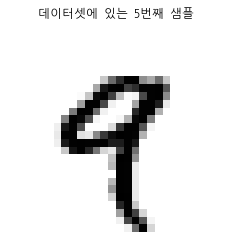

In [34]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.axis("off")
plt.title("데이터셋에 있는 5번째 샘플")
plt.show()

<br>

### 1.2.6 Manipulating tensors in Numpy

이전 예제에서 train_images[i] 같은 형식으로 첫 번째 축을 따라 특정 숫자를 선택했습니다. 배열에 있는 특정 원소들을 선택하는 것을 **슬라이싱(slicing)**이라고 합니다. 넘파이 배열에서 할 수 있는 슬라이싱 연산을 살펴보겠습니다.  

다음 예는 $11 \le x < 101$ 인 정수 x를 선택하여 (90, 28, 28)크기의 배열을 만듭니다. 

In [35]:
my_slice = train_images[10 : 100]
print("my_slice shape: {}".format(my_slice.shape))

my_slice shape: (90, 28, 28)


<br>
동일하지만 조금 더 자세한 표기법은 각 배열의 축을 따라 슬라이싱의 시작 인덱스와 마지막 인덱스를 지정하는 것입니다. 

In [36]:
my_slice = train_images[10 : 100, :, :] # 위 코드와 동일
print("my_slice shape: {}".format(my_slice.shape))

my_slice shape: (90, 28, 28)


In [37]:
my_slice = train_images[10 : 100, 0:28, 0:28] # 위 코드와 동일

In [38]:
print("my_slice shape: {}".format(my_slice.shape))

my_slice shape: (90, 28, 28)


<br>
일반적으로 각 배열의 축을 따라 어떤 인덱스 사이도 선택할 수 있습니다. 예들 들어 이미지의 오른쪽 아래 14X14픽셀을 선택하려면 다음과 같이 합니다.

In [39]:
my_slice = train_images[:, 14:, 14:]

<br>
음수 인덱스도 사용할 수 있습니다. 음수는 현재축의 끝에서 상대적인 위치를 나타냅니다. 정중앙에 위치한 14X14픽셀 조각을 이미지에서 잘라 내려면 다음과 같이 합니다.

In [40]:
my_slice = train_images[:, 7:-7, 7:-7]

<br>

### 1.2.7 The notion of data batches

일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫 번째 축(인덱스가 0부터 시작하므로 0번째 축)은 샘플 축(sample axis)입니다. MNIST에서는 숫자 이미지가 샘플입니다.  

딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않습니다. 그 대신 데이터를 작은 배치(batch)로 나눕니다. 구체적으로 말하면 MNISt 숫자 데이터에서 크기가 128인 배치 하나는 다음과 같습니다.  

```python
batch = train_images[:128]
```  

그다음 배치는 다음과 같습니다.  
```python
batch = train_images[128:256]
```  
그리고 n번째 배치는 다음과 같습니다.  
```python
batch = train_images[128*n : 128*(n+1)]
```  
이런 배치 데이터를 다룰 때는 첫 번째 축(0번 축)을 배치 축(batch axis) 또는 배치 차원이라고 부릅니다. 케라스나 다른 딥러닝 라이브러리를 사용할 때 이런 용어를 자주 만날 것입니다.

<br>

### 1.2.8 Real-world examples of data tensors

앞으로 보게 될 텐서의 몇 가지 예를 통해 좀 더 확실하게 알아보겠습니다. 우리가 사용할 데이터는 대부분 다음 중 하나에 속할 것입니다.  

- 벡터 데이터: (samples, features)크기의 2D 텐서  
- 시계열 데이터 또는 시퀀스(sequence)데이터: (samples, timesteps, features) 크기이 3D텐서  
- 이미지: (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서  
- 동영상: (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 5D 텐서  

<br>

### 1.2.9 Vector data

대부분의 경우에 해당됩니다. 이런 데이터셋에서는 하나의 데이터 포인트가 벡터로 인코딩될 수 있으므로 배치 데이터는 2D 텐서로 인코딩될 것입니다(즉 벡터의 배열입니다). 여기서 첫 번째 축은 샘플 축이고, 2번째 축은 특성 축(feature axis)입니다.  

2개의 예를 살펴보겠습니다.  

- 사람의 나이, 우편 번호, 소득으로 구성된 인구 통계 데이터. 각 사람은 3개의 값을 가진 벡터로 구성되고 10만명이 포함된 전체 데이터셋은 (100000, 3)크기의 텐서에 저장될 수 있습니다.  
- (공통 단어 2만개로 만든 사전에서) 각 단어가 등장한 횟수로 표현된 텍스트 문서 데이터셋. 각 문서는 2만개의 원소(사전에 있는 단어마다 하나의 원소에 대응합니다)를 가진 벡터로 인코딩될 수 있습니다. 500개의 문서로 이루어진 전체 데이터셋은 (500, 20000)크기의 텐서로 저장됩니다.

<br>

### 1.2.10 Timeseries data or sequence data

데이터에서 시간이 (또는 연속된 순서가) 중요할 때는 시간 축을 포함하여 3D 텐서로 저장됩니다. 각 샘플은 벡터(2D 텐서)의 시퀀스로 인코딩되므로 배치 데이터는 3D 텐서로 인코딩될 것입니다.

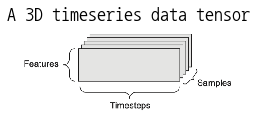

In [41]:
plt.figure(figsize=(4, 2))
plt.title("A 3D timeseries data tensor", fontsize=18)
plot_external2("./images/ch01/2.png")
plt.show()

관례적으로 시각 축은 항상 2번째(인덱스가 1인 축)입니다. 
- 주식 각격 데이터셋: 1분마다 현재 주식 가격, 지난 1분 동안에 최고 가격과 최소 가격을 저장합니다. 1분마다 데이터는 3D 벡터로 인코딩되고 하루 동안의 거래는 (390, 3) 크기의 2D 텐서로 인코딩됩니다(하루의 거래 시간은 390분입니다, 미국기준(오전 9:30 ~ 오후 4:00)). 여기에서 1일치 데이터가 하나의 샘플이 됩니다.  
- 트위 데이터셋: 각 트윗은 128개의 알파벳으로 구성된 문자 시퀀스입니다. 여기에서 각 문자가 128개의 크기인 이진 벡터로 인코딩될 수 있습니다(해당 문자의 인덱스만 1이고 나머지는 모두 0인 벡터). 그러면 각 트윗은 (280, 128)크기의 2D 텐서로 인코딩될 수 있습니다. 100만 개의 트윗으로 구성된 데이터셋은 (1000000, 280, 128) 크기의 텐서에 저장됩니다.

<br>

### 1.2.11 Image data

이미지는 전형적으로 높이, 너비, 컬러 채널의 3차원으로 이루어집니다.(MNIST 숫자처럼) 흑백 이미지는 하나의 컬러 채널만을 가지고 있어 2D 텐서로 저장될 수 있지만 관례상 이미지 텐서는 항상 3D로 저장됩니다. 흑백 이미지의 경우 컬러 채널의 차원 크기는 1입니다. 256X256 크기의 흑백 이미지에 대한 128개의 배치는 (128, 256, 256, 1)크기의 텐서에 저장될 수 있습니다. 컬러 이미지에 대한 128개의 배치라면 (128, 256, 256, 3)크기의 텐서에 저장될 수 있습니다.

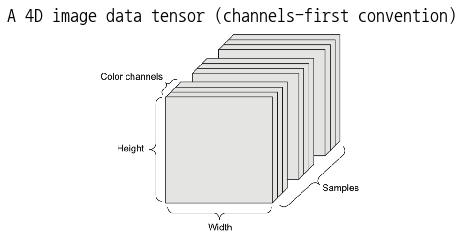

In [42]:
plt.figure(figsize=(8, 4))
plt.title("A 4D image data tensor (channels-first convention)", fontsize=18)
plot_external2("./images/ch01/3.png")
plt.show()

이미지 텐서의 크기를 지정하는 방식은 2가지입니다. (텐서플로에서 사용하는) 채널 마지막(channel-last)방식과 (씨아노에서 사용하는) 채널 우선(channel-first) 방식입니다. 구글의 텐서플로 머신러닝 프레임워크는 (samples, height, width, **color_depth**)처럼 컬러 채널의 깊이를 끝에 놓습니다. 반면에 씨아노는 (samples, **color_depth**, height, width)처럼 컬러 채널의 깊이를 배치 축 바로 뒤에 놓습니다. 씨아노 방식을 사용하면 앞의 예는 (128, 1, 256, 256)이 됩니다. 케라스 프레임워크는 2가지 형식을 모두 지원합니다.  
케라스 설정 파일 keras.json에서 "image_data_format"옵션을 "channels_last" 또는 "channels_first"로 지정할 수 있습니다.

<br>

### 1.2.12 Video data

비디오 데이터는 현실에서 5D 텐서가 필요한 몇 안되는 데이터 중 하나입니다. 하나의 비디오는 프레임의 연속이고 각 프레임은 하나의 컬러 이미지입니다. 프레임이 (height, width, color_depth)의 3D 텐서로 저장될 수 있기 때문에 프레임의 연속은 (frames, height, width, color_depth)의 4D 텐서로 저장될 수 있습니다. 여러 비디오의 배치는 (samples, frames, height, width, color_depth)의 5D 텐서로 저장될 수 있습니다.  

예를들어 60초 짜리 144X256 유튜브 비디오 클립을 초등 4프레임으로 샘플링하면 240프레임이 됩니다. 이런 비디오 클립을 4개 가진 배치는 (4, 240, 144, 256, 3)크기의 텐서에 저장될 것입니다. 총 106,168,320개의 값이 있습니다. 이 텐서의 dtype을 float32로 했다면 각 값이 32비트로 저장될 것이므로 저장 크기는 405MB가 됩니다. 실생활에서 접하는 비디오는 float32 크기로 저장되지 않기 때문에 훨씬 용량이 적고, 일반적으로 높은 압축률로 (MPEG 포맷 같은 방식을 사용하여) 압축되어 있습니다.